In [ ]:
### WINE QUALITY PREDICTION

In [ ]:
## IMPORT LIBRARIES

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


In [ ]:
## LOAD DATASET

from google.colab import files
uploaded = files.upload()

Saving WineQT.csv to WineQT.csv


In [ ]:
data = pd.read_csv("WineQT.csv")
print(data.info())
print(data.isnull().sum())
print(data.duplicated().sum())



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
 12  Id                    1143 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 116.2 KB
None
fixed acidity           0
volatile acidity        0
citric acid       

In [ ]:
## EXPLORE THE DATA

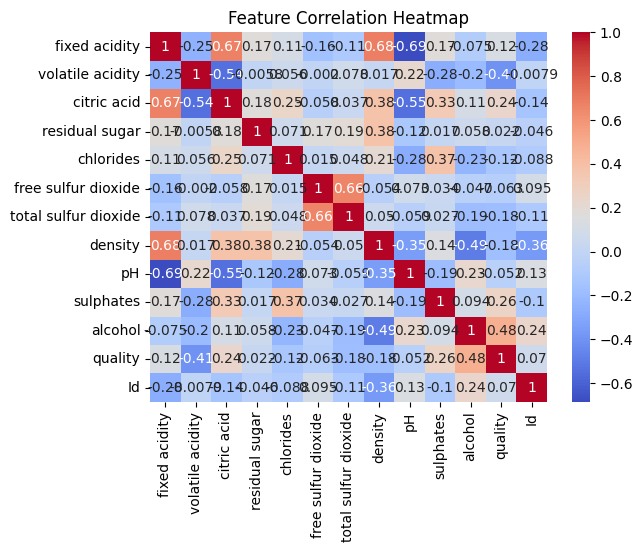

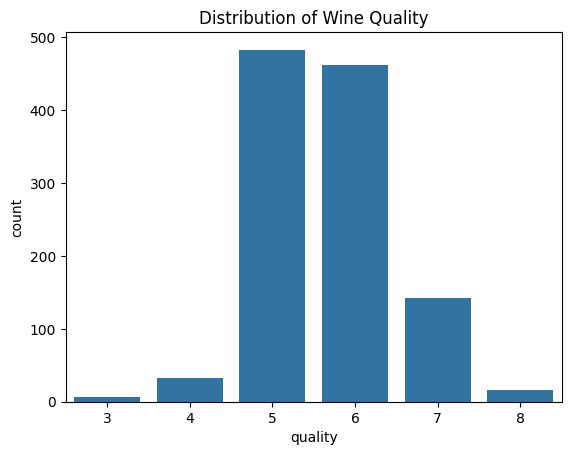

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()

sns.countplot(x='quality', data=data)
plt.title("Distribution of Wine Quality")
plt.show()


In [ ]:
## DATA PREPROCESSING

In [ ]:
def categorize_quality(value):
    if value <= 4:
        return 0  # Low quality
    elif value <= 6:
        return 1  # Medium
    else:
        return 2  # High quality

data['quality_label'] = data['quality'].apply(categorize_quality)


In [ ]:
X = data.drop(['quality', 'Id', 'quality_label'], axis=1)
y = data['quality_label']


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [ ]:
## TRAIN TEST SPLITS

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [ ]:
## MODEL TRAINING

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC

rf = RandomForestClassifier(random_state=42)
sgd = SGDClassifier(random_state=42)
svc = SVC(random_state=42)

rf.fit(X_train, y_train)
sgd.fit(X_train, y_train)
svc.fit(X_train, y_train)


SVC(random_state=42)

In [ ]:
## MODEL EVALUATION


Random Forest Results:
Accuracy: 0.8995633187772926
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         6
           1       0.92      0.96      0.94       195
           2       0.72      0.64      0.68        28

    accuracy                           0.90       229
   macro avg       0.55      0.54      0.54       229
weighted avg       0.87      0.90      0.89       229



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


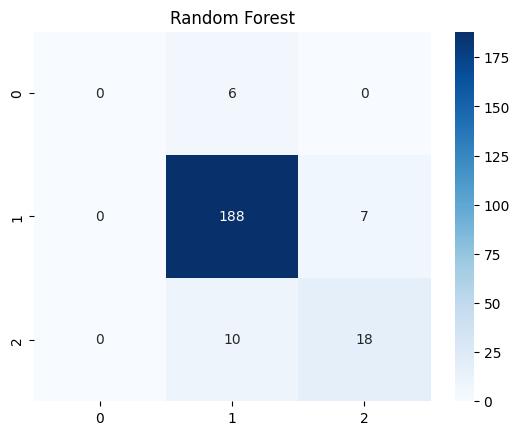


SGD Results:
Accuracy: 0.8471615720524017
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         6
           1       0.87      0.96      0.91       195
           2       0.50      0.21      0.30        28

    accuracy                           0.85       229
   macro avg       0.46      0.39      0.40       229
weighted avg       0.80      0.85      0.82       229



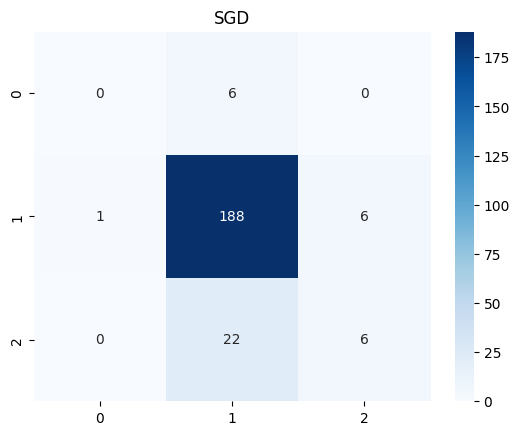


SVC Results:
Accuracy: 0.8646288209606987
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         6
           1       0.88      0.97      0.92       195
           2       0.62      0.29      0.39        28

    accuracy                           0.86       229
   macro avg       0.50      0.42      0.44       229
weighted avg       0.82      0.86      0.84       229



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


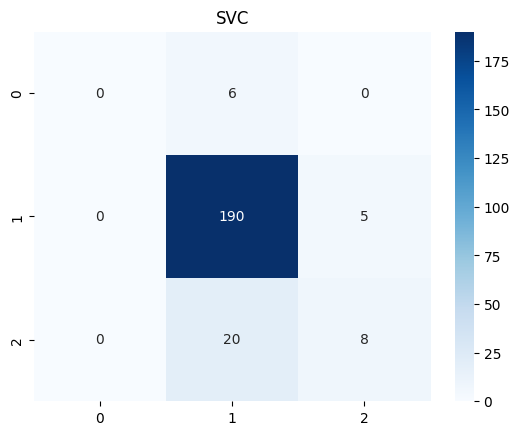

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

models = {'Random Forest': rf, 'SGD': sgd, 'SVC': svc}

for name, model in models.items():
    y_pred = model.predict(X_test)
    print(f"\n{name} Results:")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
    plt.title(name)
    plt.show()


In [ ]:
## COMPARE MODEL PERFORMANCE

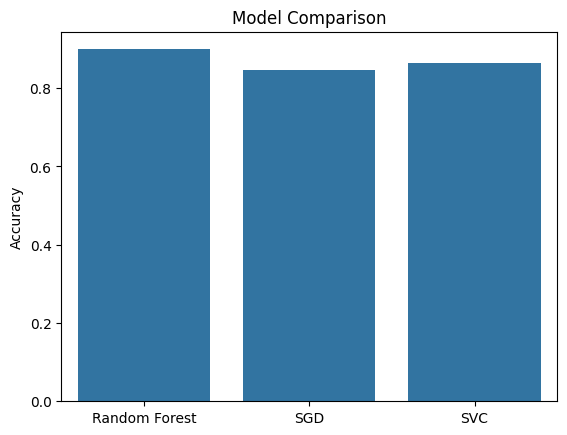

In [ ]:
accuracies = [accuracy_score(y_test, model.predict(X_test)) for model in models.values()]
sns.barplot(x=list(models.keys()), y=accuracies)
plt.ylabel("Accuracy")
plt.title("Model Comparison")
plt.show()
